In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'gtsrb-german-traffic-sign:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F82373%2F191501%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240921%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240921T095631Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D80a6cb6487f5825859b11cb147080a1f29f611ba83c633e0ab77a73d126399d108992d4204ca707dbc503b6da687a8b4783ed7a88ada18aa49934b810f508dbd6f75dd4bca3dc970ee7683f0e3c41647f1c5e0eeda0b9011bb72e8a0937bfa53c078fd3289be7e1431103448121f189ced902eecdc485afe786375604cf20def5aeaf65a8056d060e9e8ac3b7d4005f6cd64cd640e80e0f2a345b99b46f3401852f45771158518f2ffd5faeabfe04928114635a3f02fbcb62f64df75e6f318d66d1caf7670df55188c39d2a7576fd180f5be1025d5e7a058ab1ec10f1c239d216a270bdad0b1e17cf6ea7a2c4450c8d1f6de60e1a823bcf9a396bf52c8b63232'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


OSError: [Errno 30] Read-only file system: '/kaggle'

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/kaggle/input/gtsrb-german-traffic-sign/Test/01724.png
/kaggle/input/gtsrb-german-traffic-sign/Test/06872.png
/kaggle/input/gtsrb-german-traffic-sign/Test/12077.png
/kaggle/input/gtsrb-german-traffic-sign/Test/04525.png
/kaggle/input/gtsrb-german-traffic-sign/Test/00720.png
/kaggle/input/gtsrb-german-traffic-sign/Test/10353.png
/kaggle/input/gtsrb-german-traffic-sign/Test/11828.png
/kaggle/input/gtsrb-german-traffic-sign/Test/04952.png
/kaggle/input/gtsrb-german-traffic-sign/Test/12518.png
/kaggle/input/gtsrb-german-traffic-sign/Test/06411.png
/kaggle/input/gtsrb-german-traffic-sign/Test/11058.png
/kaggle/input/gtsrb-german-traffic-sign/Test/01840.png
/kaggle/input/gtsrb-german-traffic-sign/Test/00780.png
/kaggle/input/gtsrb-german-traffic-sign/Test/02923.png
/kaggle/input/gtsrb-german-traffic-sign/Test/07855.png
/kaggle/input/gtsrb-german-traffic-sign/Test/02916.png
/kaggle/input/gtsrb-german-traffic-sign/Test/02578.png
/kaggle/input/gtsr

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
train_csv=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')
test_csv=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

In [ ]:
train = '/kaggle/input/gtsrb-german-traffic-sign/train'
test = '/kaggle/input/gtsrb-german-traffic-sign/test'

In [ ]:
meta='/kaggle/input/gtsrb-german-traffic-sign/Meta'

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
path = train
labels = []
images = []

for c in classes:
  c_path = os.path.join(path,str(c))
  for img in os.listdir(c_path):
    images.append(os.path.join(c_path,img))
    labels.append(c)

In [ ]:
df = pd.DataFrame()
df['images'] = images
df['labels'] = labels
df['class'] = df['labels'].map(classes)

In [ ]:
df.head()

,images,labels,class
0,/kaggle/input/gtsrb-german-traffic-sign/train/...,0,Speed limit (20km/h)
1,/kaggle/input/gtsrb-german-traffic-sign/train/...,0,Speed limit (20km/h)
2,/kaggle/input/gtsrb-german-traffic-sign/train/...,0,Speed limit (20km/h)
3,/kaggle/input/gtsrb-german-traffic-sign/train/...,0,Speed limit (20km/h)
4,/kaggle/input/gtsrb-german-traffic-sign/train/...,0,Speed limit (20km/h)


In [ ]:
df.sample(10)

,images,labels,class
11084,/kaggle/input/gtsrb-german-traffic-sign/train/...,7,Speed limit (100km/h)
14928,/kaggle/input/gtsrb-german-traffic-sign/train/...,10,No passing veh over 3.5 tons
21583,/kaggle/input/gtsrb-german-traffic-sign/train/...,13,Yield
13883,/kaggle/input/gtsrb-german-traffic-sign/train/...,9,No passing
30438,/kaggle/input/gtsrb-german-traffic-sign/train/...,26,Traffic signals
29005,/kaggle/input/gtsrb-german-traffic-sign/train/...,25,Road work
22334,/kaggle/input/gtsrb-german-traffic-sign/train/...,14,Stop
12985,/kaggle/input/gtsrb-german-traffic-sign/train/...,8,Speed limit (120km/h)
12477,/kaggle/input/gtsrb-german-traffic-sign/train/...,8,Speed limit (120km/h)
4753,/kaggle/input/gtsrb-german-traffic-sign/train/...,3,Speed limit (60km/h)


In [ ]:
def show_random_images_by_label(label, n=6):
    label_df = df[df['labels'] == label]

    # If there is not enough data for the label, give a warning
    if len(label_df) < n:
        print(f"There are {len(label_df)} images only")
        n = len(label_df)

    random_images = label_df.sample(n=n)

    fig, axes = plt.subplots(1, n, figsize=(20, 5))
    fig.suptitle(classes[label], fontsize=16)

    for i, (idx, row) in enumerate(random_images.iterrows()):
        img = cv2.imread(row['images'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

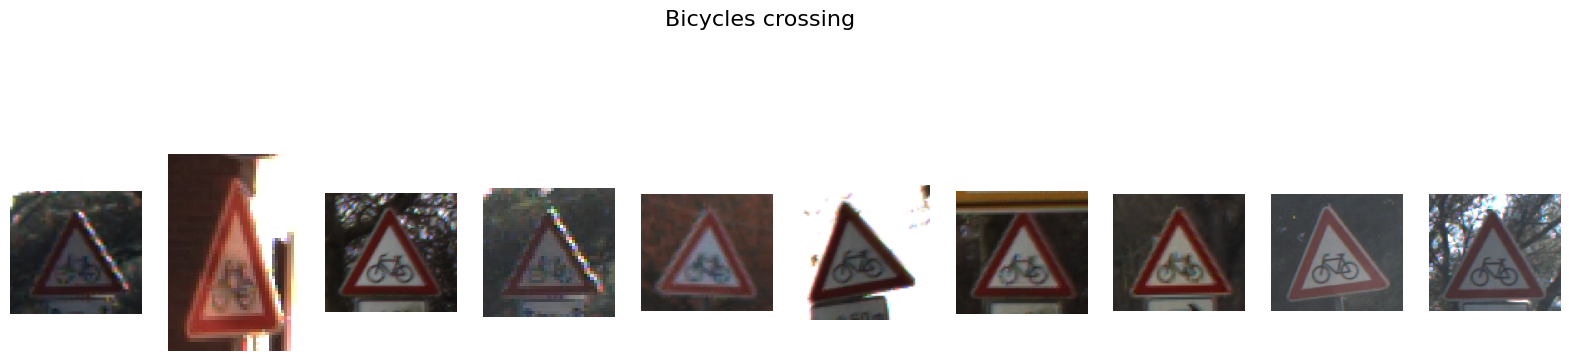

In [ ]:
show_random_images_by_label(label=29, n=10)

In [ ]:
x = []
for img in df['images']:
  img = cv2.imread(img)
  img = cv2.resize(img, (32,32))
  img = img / 255
  x.append(img)

In [ ]:
x = np.array(x)
y = df['labels']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=Sequential()
model.add(Input(shape=(32,32,3)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192,459 (751.79 KB)

 Trainable params: 192,011 (750.04 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30)

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 61ms/step - accuracy: 0.6200 - loss: 1.3125 - val_accuracy: 0.9663 - val_loss: 0.1028
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.9643 - loss: 0.1080 - val_accuracy: 0.9697 - val_loss: 0.1098
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.9766 - loss: 0.0776 - val_accuracy: 0.9815 - val_loss: 0.0662
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9834 - loss: 0.0572 - val_accuracy: 0.9762 - val_loss: 0.0903
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9877 - loss: 0.0406 - val_accuracy: 0.9814 - val_loss: 0.0721
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9802 - loss: 0.0755 - val_accuracy: 0.9795 - val_loss: 0.0713
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9910 - loss: 0.0348 - val_accuracy: 0.9682 - val_loss: 0.1090
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9913 - loss: 0.0306 - 

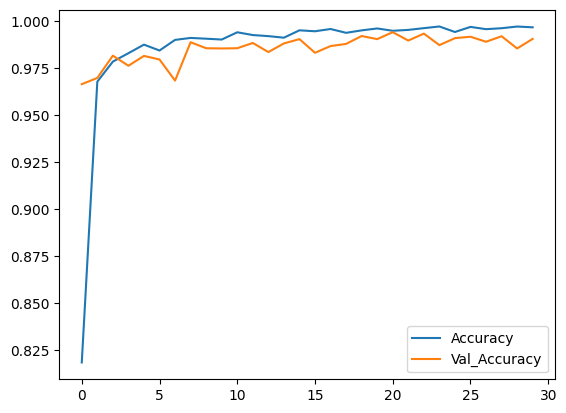

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend();

In [ ]:
pred = model.predict(x_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


In [ ]:
model.save('traffic_sign_model.h5')